In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as m
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_auc_score

In [8]:
from google.colab import files
files.upload()

Saving bank_marketing.csv to bank_marketing (1).csv


{'bank_marketing.csv': b'age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response\r\n58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no\r\n44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no\r\n33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no\r\n47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no\r\n33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no\r\n35,management,100000,married,tertiary,yes,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no\r\n28,management,100000,single,tertiary,no,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no\r\n42,entrepreneur,120000,divorced,tertiary,no,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no\r\n58,retired,55000,married,primary,yes,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no\r\

In [9]:
df = pd.read_csv("bank_marketing.csv")

In [10]:
df.shape

(45211, 19)

In [11]:
df.head()

age           job  salary  marital  ... pdays previous poutcome  response
0   58    management  100000  married  ...    -1        0  unknown        no
1   44    technician   60000   single  ...    -1        0  unknown        no
2   33  entrepreneur  120000  married  ...    -1        0  unknown        no
3   47   blue-collar   20000  married  ...    -1        0  unknown        no
4   33       unknown       0   single  ...    -1        0  unknown        no

[5 rows x 19 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


- Describe the pdays column, make note of the mean, median and minimum values. Anything
fishy in the values?

In [13]:
df.describe()

age         salary  ...         pdays      previous
count  45211.000000   45211.000000  ...  45211.000000  45211.000000
mean      40.936210   57006.171065  ...     40.197828      0.580323
std       10.618762   32085.718415  ...    100.128746      2.303441
min       18.000000       0.000000  ...     -1.000000      0.000000
25%       33.000000   20000.000000  ...     -1.000000      0.000000
50%       39.000000   60000.000000  ...     -1.000000      0.000000
75%       48.000000   70000.000000  ...     -1.000000      0.000000
max       95.000000  120000.000000  ...    871.000000    275.000000

[8 rows x 8 columns]

- Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How
different are the mean and the median values?

In [14]:
df['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [15]:
df['pdays'].median()

-1.0

In [16]:
df.pdays.value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

mean= 40.1978,
median= -1.0,
minimum= -1.0

In [17]:
np.mean(df.pdays)

40.19782796222158

In [18]:
np.median(df.pdays)

-1.0

the values of mean and median are same

- Plot a horizontal bar graph with the median values of balance for each education level value.
Which group has the highest median?

In [19]:
a=df.groupby('education')['balance'].median().sort_values()

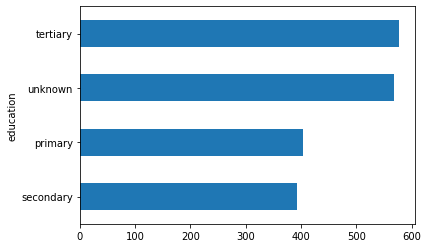

In [20]:
a.plot(kind='barh')

tertiary education group has the highest median

- Make a box plot for pdays. Do you see any outliers?

In [21]:
df.pdays.isnull().sum()

0

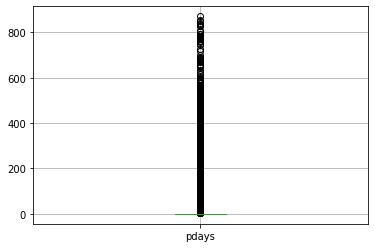

In [22]:
df.boxplot('pdays')

their are none outliers

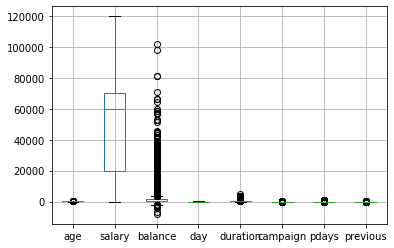

In [23]:
df.boxplot()

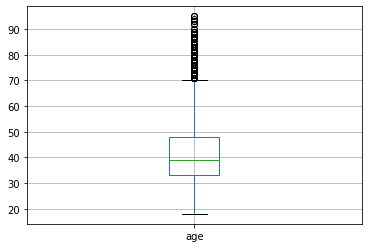

In [24]:
df.boxplot('age')

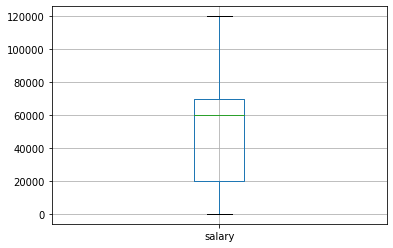

In [25]:
df.boxplot('salary')

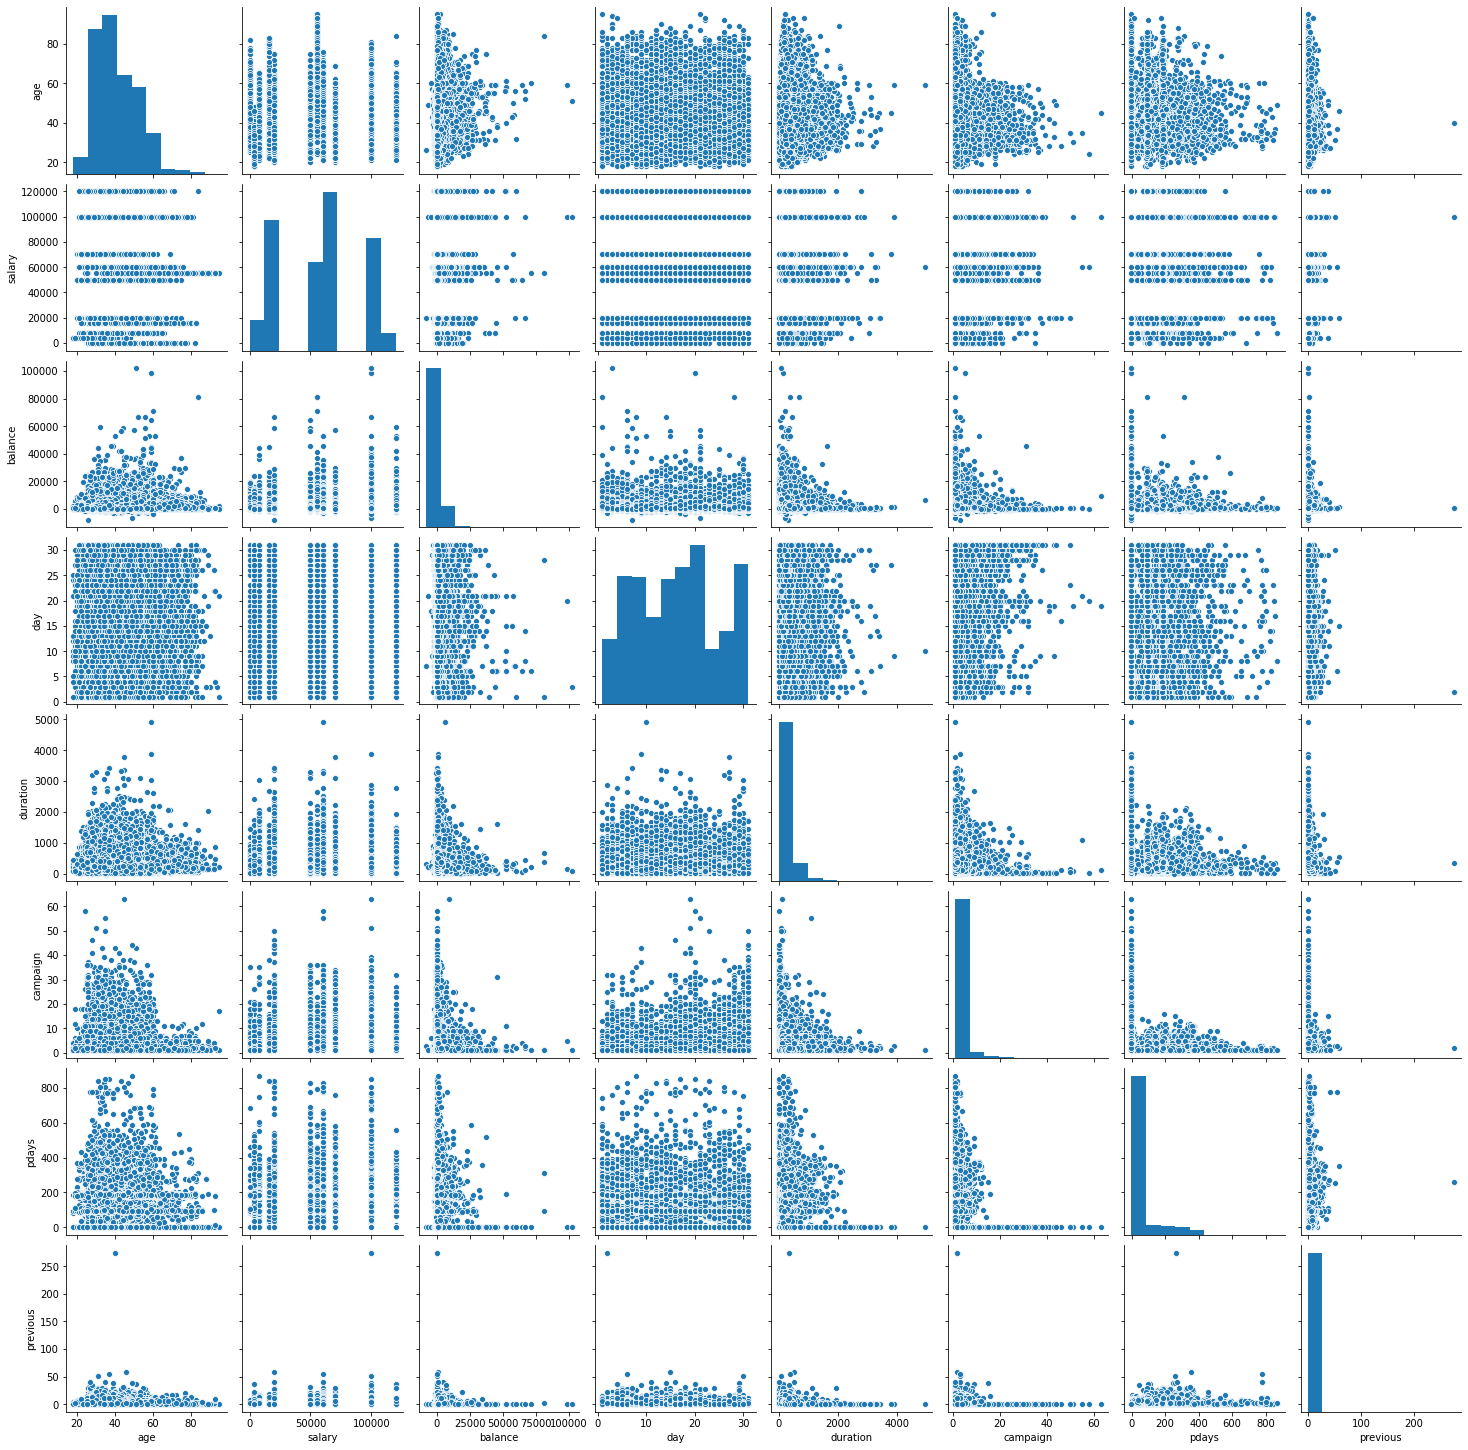

In [26]:
sns.pairplot(df)

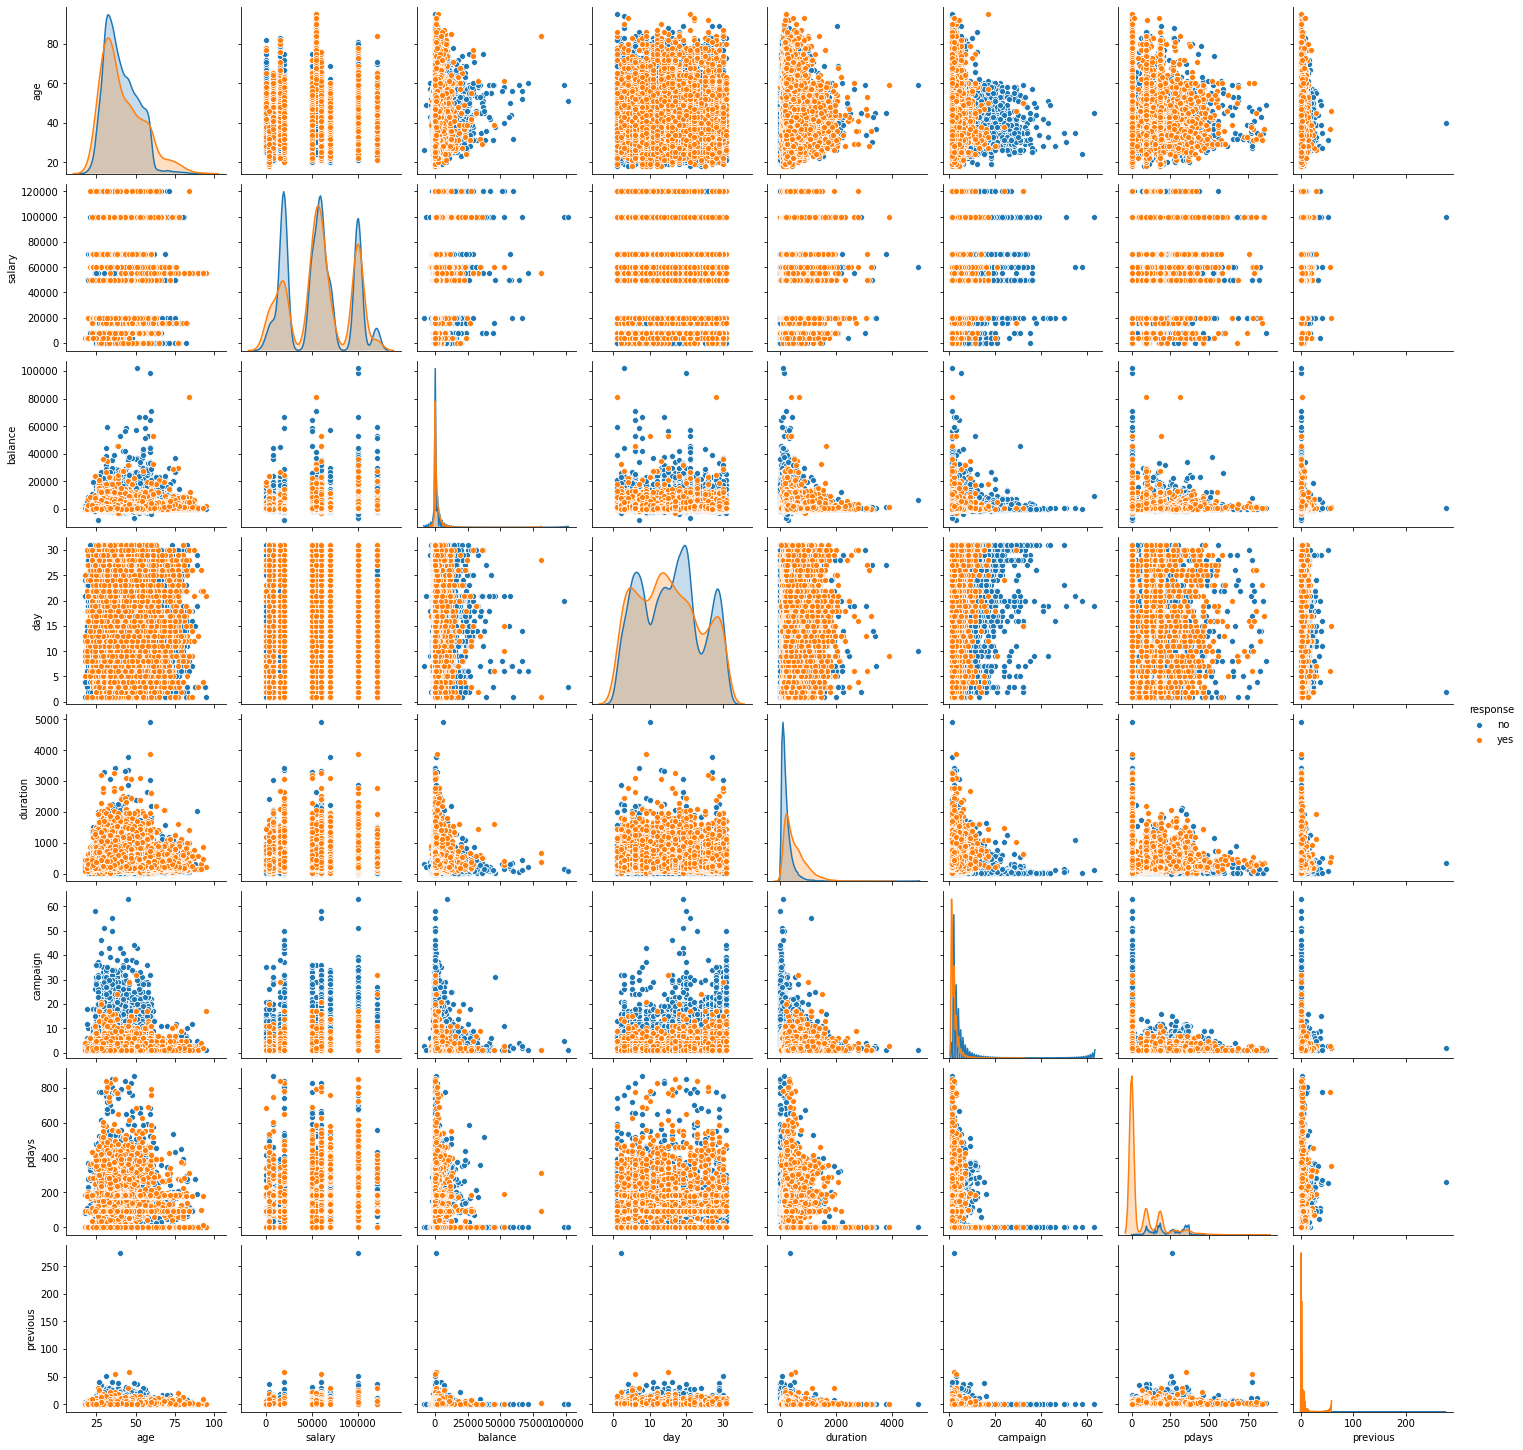

In [27]:
sns.pairplot(df,hue='response')

In [28]:
df.corr()

age    salary   balance  ...  campaign     pdays  previous
age       1.000000  0.024357  0.097783  ...  0.004760 -0.023758  0.001288
salary    0.024357  1.000000  0.055469  ...  0.015005 -0.014968  0.014564
balance   0.097783  0.055469  1.000000  ... -0.014578  0.003435  0.016674
day      -0.009120  0.027864  0.004503  ...  0.162490 -0.093044 -0.051710
duration -0.004648 -0.009937  0.021560  ... -0.084570 -0.001565  0.001203
campaign  0.004760  0.015005 -0.014578  ...  1.000000 -0.088628 -0.032855
pdays    -0.023758 -0.014968  0.003435  ... -0.088628  1.000000  0.454820
previous  0.001288  0.014564  0.016674  ... -0.032855  0.454820  1.000000

[8 rows x 8 columns]

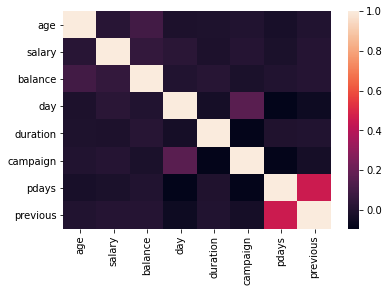

In [29]:
sns.heatmap(df.corr())

Data is non-linear, asymmetric
Hence selection of features will not depend upon correlation factor.
Also not a single feature is correlated completely with class, hence requires combinantion of features.

- encoding categorical to numeric data

In [30]:
df.dtypes

age           int64
job          object
salary        int64
marital      object
education    object
targeted     object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
response     object
dtype: object

In [31]:
df_new=pd.get_dummies(df,columns=['job','marital','education','targeted','default','housing','loan','contact','month','poutcome'])

convert respnose in numeric

In [32]:
df_new.response.replace(('yes','no'),(1,0), inplace=True)

In [33]:
df_new.dtypes

age                    int64
salary                 int64
balance                int64
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
response               int64
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
targeted_no            uint8
targeted_yes           uint8
default_no             uint8
default_yes            uint8
housing_no             uint8
housing_yes            uint8
loan_no       

In [34]:
from xgboost import XGBClassifier
classifiers = {
               'Logistic Regression':LogisticRegression(),
               'Random Forest Classifier': RandomForestClassifier(),

               }

In [35]:
df_y = pd.DataFrame(df_new['response'])
df_X = df_new.drop(['response'], axis=1)
print(df_X.columns)
print(df_y.columns)

Index(['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'targeted_no', 'targeted_yes', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')
Index(['response'], dtype='object')


In [36]:
log_cols = ["Classifier", "Accuracy","Precision Score","Recall Score","F1-Score","roc-auc_Score"]
log = pd.DataFrame(columns=log_cols)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=2, stratify=df_y)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(31647, 54)
(13564, 54)
(31647, 1)
(13564, 1)


In [38]:
from sklearn import svm
from xgboost import XGBClassifier
clf = LogisticRegression()
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_pred = clf.predict(X_test)

In [41]:
print (clf.intercept_)
print ()
print (clf.coef_)
print ()
print (X_train.columns)


[-0.00156486]

[[-5.99786313e-02 -5.56889355e-06  4.87222888e-05 -2.51806321e-02
   3.05124882e-03 -5.37465654e-03  2.21628778e-03  6.34804390e-04
  -1.40032550e-04 -1.27855265e-03  3.27645259e-05 -1.66501693e-04
   3.84329682e-04  6.40581007e-05 -1.40121663e-05 -3.64762454e-05
  -9.39263138e-05 -9.02759169e-05 -1.83109675e-04 -4.31235059e-05
  -1.33514967e-04 -1.13854518e-03 -2.92798264e-04 -6.43063257e-04
  -1.10838149e-03  2.88637792e-04 -1.02051452e-04  5.59600452e-05
  -1.62081845e-03 -1.51586569e-03 -4.89927231e-05 -1.82649966e-04
  -1.38220844e-03 -1.18429515e-03 -3.80563257e-04 -4.69180582e-04
  -9.51405824e-05 -1.00053724e-03 -2.78315631e-05 -1.17719058e-04
   2.50847727e-05 -4.40125052e-05 -5.97875616e-05 -3.15640856e-04
  -2.51868323e-04  7.47366951e-05 -8.98430824e-04 -1.01434167e-04
   8.54142948e-05  6.66306865e-05 -1.36683516e-04 -1.50771329e-05
   2.99127512e-04 -1.71222527e-03]]

Index(['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previou

In [42]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.8869802418165733


In [43]:
predictions = clf.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
print(confusion_matrix(y_test, predictions))

# New line
print('\n')

# Classification report
print(classification_report(y_test,predictions))

[[11786   191]
 [ 1342   245]]


              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11977
           1       0.56      0.15      0.24      1587

    accuracy                           0.89     13564
   macro avg       0.73      0.57      0.59     13564
weighted avg       0.86      0.89      0.86     13564



In [46]:
from sklearn.feature_selection import RFE
rfe = RFE(clf)
rfe = rfe.fit(df_new, df_new.response)
# summarize the selection of the attributess
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[False False False False False False False False  True False False False
 False False  True False False False False False False False  True  True
  True False  True False False False False False  True  True  True  True
  True  True  True  True  True  True False  True  True False  True  True
  True  True  True  True  True  True  True]
[22 28 27 23 25  6 24 18  1 21  4 10  3 13  1 12  5 29  7 15 26 17  1  1
  1 19  1 20 16 11  8 14  1  1  1  1  1  1  1  1  1  1  9  1  1  2  1  1
  1  1  1  1  1  1  1]


In [47]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_X.values, i) for i in range(df_X.shape[1])]
vif["features"] = df_X.columns

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [49]:
vif.round(1)

VIF Factor             features
0          1.7                  age
1          inf               salary
2          1.1              balance
3          1.3                  day
4          1.0             duration
5          1.1             campaign
6          4.7                pdays
7          1.4             previous
8          inf           job_admin.
9          inf      job_blue-collar
10         inf     job_entrepreneur
11         inf        job_housemaid
12         inf       job_management
13         inf          job_retired
14         inf    job_self-employed
15         inf         job_services
16         inf          job_student
17         inf       job_technician
18         inf       job_unemployed
19         inf          job_unknown
20         inf     marital_divorced
21         inf      marital_married
22         inf       marital_single
23         inf    education_primary
24         inf  education_secondary
25         inf   education_tertiary
26         inf    education_unknown
27         inf          targeted_no
28         inf         targeted_yes
29         inf           default_no
30         inf          default_yes
31         inf           housing_no
32         inf          housing_yes
33         inf              loan_no
34         inf             loan_yes
35         inf     contact_cellular
36         inf    contact_telephone
37         inf      contact_unknown
38         inf            month_apr
39         inf            month_aug
40         inf            month_dec
41         inf            month_feb
42         inf            month_jan
43         inf            month_jul
44         inf            month_jun
45         inf            month_mar
46         inf            month_may
47         inf            month_nov
48         inf            month_oct
49         inf            month_sep
50         inf     poutcome_failure
51         inf       poutcome_other
52         inf     poutcome_success
53         inf     poutcome_unknown

In [57]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  ext

Cross-Validation Accuracy Scores [0.88688784 0.88436019 0.88467615 0.89004739 0.88657188 0.88815166
 0.8906793  0.88432364 0.88716814 0.88969659]


In [58]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.8843236409608091, 0.8872562776735909, 0.8906793048973144)

What is the precision, recall, accuracy of your model?

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11977
           1       0.56      0.15      0.24      1587

    accuracy                           0.89     13564
   macro avg       0.73      0.57      0.59     13564
weighted avg       0.86      0.89      0.86     13564



##Random Forest

splitting the data

In [67]:
# response are the values we want to predict
df_response = np.array(df_y['response'])

df_features = np.array(df_X)
X_list=list(df_X.columns)

In [68]:

X_train, X_test, y_train, y_test = train_test_split(df_features, df_response, test_size=0.25, random_state=42)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(33908, 54)
(11303, 54)
(33908,)
(11303,)


In [74]:
df.head()

age           job  salary  marital  ... pdays previous poutcome  response
0   58    management  100000  married  ...    -1        0  unknown        no
1   44    technician   60000   single  ...    -1        0  unknown        no
2   33  entrepreneur  120000  married  ...    -1        0  unknown        no
3   47   blue-collar   20000  married  ...    -1        0  unknown        no
4   33       unknown       0   single  ...    -1        0  unknown        no

[5 rows x 19 columns]

In [76]:
# The baseline predictions are the historical averages
baseline_preds = X_test[:, X_list.index('balance')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - y_test)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))


Average baseline error:  1427.92


In [77]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [78]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))


Mean Absolute Error: 0.13


In [79]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: nan %.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
